In [79]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History 
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading Data and Splitting X and Y

In [114]:
df = pd.read_csv('fall_dataset.csv', sep=',',header=[0])
df.apply(pd.to_numeric)
df.head()

,X_ACC,Y_ACC,Z_ACC,X_GYRO,Y_GYRO,Z_GYRO,Label
0,0.859375,-0.065918,-0.441162,-2.101562,-0.875000,0.734375,1
1,0.864990,-0.064209,-0.448975,-1.132812,0.843750,0.617188,1
2,0.859863,-0.066406,-0.451172,-1.210938,-0.703125,0.671875,1
3,0.861328,-0.063721,-0.446533,-1.031250,0.703125,-0.742188,1
4,0.939209,0.006104,-0.523926,-2.960938,0.382812,0.617188,1


In [115]:
df.shape

(1898, 7)

In [116]:
df_x = df.iloc[:,:6]
df_x.head(3)

,X_ACC,Y_ACC,Z_ACC,X_GYRO,Y_GYRO,Z_GYRO
0,0.859375,-0.065918,-0.441162,-2.101562,-0.875000,0.734375
1,0.864990,-0.064209,-0.448975,-1.132812,0.843750,0.617188
2,0.859863,-0.066406,-0.451172,-1.210938,-0.703125,0.671875


In [117]:
df_y = df.iloc[:,6:]
df_y.head(3)

,Label
0,1
1,1
2,1


### Class Balance

In [118]:
df_y['Label'].value_counts()/len(df_y)

1    0.528451
0    0.471549
Name: Label, dtype: float64

Text(0.5, 0, '0: Walking 1:Fall')

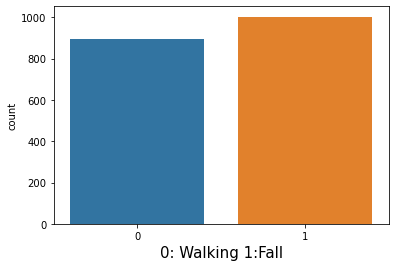

In [119]:
fig = sns.countplot(x='Label',data=df_y)
fig.set_xlabel("0: Walking 1:Fall", fontsize = 15)

### Pairwise Relationship in the Dataset

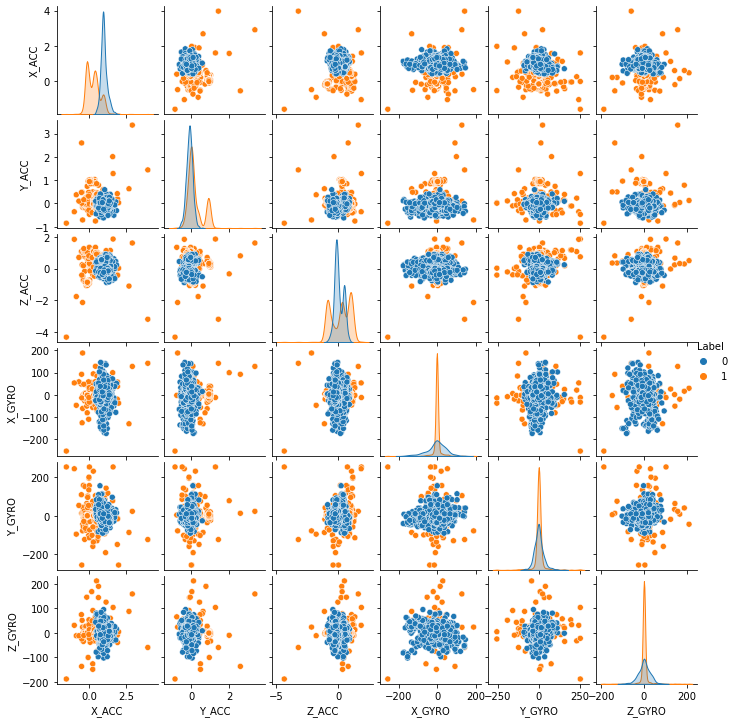

In [122]:
g = sns.pairplot(df,hue= 'Label') 
g.fig.set_size_inches(10,10)

### Splitting the data for train, test and validation data

In [135]:
X = df_x
Y = df_y
X_t, X_test, Y_t,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 123)
X_train, X_validation, Y_train,Y_validation = train_test_split(X_t,Y_t,test_size = 0.25, random_state = 123)

In [136]:
print('Training Dataset :', "{0:,}".format(X_train.shape[0])  )
print('Validation Dataset :', "{0:,}".format(X_validation.shape[0]) )
print('Test Dataset :', "{0:,}".format(X_test.shape[0]) ) 

Training Dataset : 1,138
Validation Dataset : 380
Test Dataset : 380


### Creating Deep Learning Model

- Only one layer simple sequential model

In [137]:
class_weight = {0: 1,
                1: 1
                }

In [138]:
# get the model
def get_model(n_inputs, n_outputs): 
    model = Sequential()
    model.add(Dense(64, input_dim=6, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_1 = get_model(X_train.shape[1], Y_train.shape[1])
history = model_1.fit(X, Y,epochs=500,batch_size=128,class_weight=class_weight,validation_data=(X_train, Y_train))

yhat = model_1.predict(X_test)
yhat = yhat.round()
acc = accuracy_score(Y_test.to_numpy(), yhat)
print(acc)

Epoch 1/500
15/15 [==============================] - 0s 10ms/step - loss: 1.6321 - accuracy: 0.5806 - val_loss: 0.9607 - val_accuracy: 0.5439
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8055 - accuracy: 0.5469 - val_loss: 0.6972 - val_accuracy: 0.5422
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.5954 - val_loss: 0.6375 - val_accuracy: 0.6248
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.6544 - val_loss: 0.5975 - val_accuracy: 0.7012
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.7503 - val_loss: 0.5680 - val_accuracy: 0.7856
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.8130 - val_loss: 0.5470 - val_accuracy: 0.8401
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.8398 - val_loss: 0.5298 - val_accuracy: 0.8409
Epoch 8/500


Epoch 59/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.8888 - val_loss: 0.2585 - val_accuracy: 0.8866
Epoch 60/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2695 - accuracy: 0.8904 - val_loss: 0.2578 - val_accuracy: 0.8910
Epoch 61/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.8878 - val_loss: 0.2575 - val_accuracy: 0.8928
Epoch 62/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2678 - accuracy: 0.8941 - val_loss: 0.2567 - val_accuracy: 0.8893
Epoch 63/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.8946 - val_loss: 0.2540 - val_accuracy: 0.8910
Epoch 64/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.8894 - val_loss: 0.2548 - val_accuracy: 0.8866
Epoch 65/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.8925 - val_loss: 0.2526 - val_accuracy: 0.8946
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9173 - val_loss: 0.2035 - val_accuracy: 0.9192
Epoch 174/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.9199 - val_loss: 0.2046 - val_accuracy: 0.9253
Epoch 175/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9152 - val_loss: 0.2060 - val_accuracy: 0.9156
Epoch 176/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9210 - val_loss: 0.2057 - val_accuracy: 0.9253
Epoch 177/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9199 - val_loss: 0.2015 - val_accuracy: 0.9227
Epoch 178/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.9199 - val_loss: 0.2027 - val_accuracy: 0.9253
Epoch 179/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9199 - val_loss: 0.2028 - val_accuracy: 0.9192
Epoch 180/500

15/15 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9231 - val_loss: 0.1777 - val_accuracy: 0.9279
Epoch 288/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1890 - accuracy: 0.9283 - val_loss: 0.1796 - val_accuracy: 0.9253
Epoch 289/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.9252 - val_loss: 0.1799 - val_accuracy: 0.9297
Epoch 290/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.9236 - val_loss: 0.1805 - val_accuracy: 0.9244
Epoch 291/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9262 - val_loss: 0.1871 - val_accuracy: 0.9323
Epoch 292/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9273 - val_loss: 0.1831 - val_accuracy: 0.9279
Epoch 293/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9226 - val_loss: 0.1782 - val_accuracy: 0.9279
Epoch 294/500

15/15 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9289 - val_loss: 0.1646 - val_accuracy: 0.9341
Epoch 402/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.9283 - val_loss: 0.1665 - val_accuracy: 0.9297
Epoch 403/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.9278 - val_loss: 0.1639 - val_accuracy: 0.9367
Epoch 404/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9326 - val_loss: 0.1667 - val_accuracy: 0.9306
Epoch 405/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.9289 - val_loss: 0.1758 - val_accuracy: 0.9306
Epoch 406/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.9241 - val_loss: 0.1648 - val_accuracy: 0.9350
Epoch 407/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9305 - val_loss: 0.1634 - val_accuracy: 0.9306
Epoch 408/500

In [139]:
print(model_1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                448       
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


### Accuracy and Loss

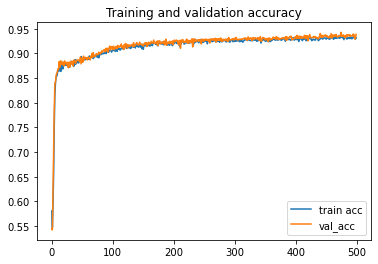

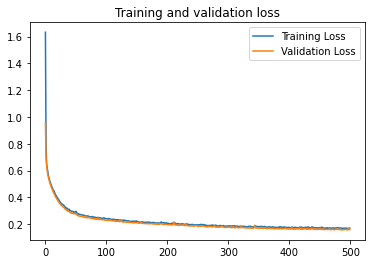

In [140]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

plt.plot(epochs, acc, label = 'train acc' )
plt.plot(epochs, val_acc, label = 'val_acc' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label = 'Training Loss' )
plt.plot(epochs, val_loss, label = 'Validation Loss' )
plt.title ('Training and validation loss'   )
plt.legend()

In [141]:
training_pred = model_1.predict(X_train)
validation_pred = model_1.predict(X_validation)
test_pred = model_1.predict(X_test)

tra_acc = accuracy_score(Y_train.to_numpy(), training_pred.round())
val_acc = accuracy_score(Y_validation.to_numpy(), validation_pred.round())
test_acc = accuracy_score(Y_test.to_numpy(), test_pred.round())

print('Training Acc :', "{0:,}".format(tra_acc)  )
print('Validation Acc :', "{0:,}".format(val_acc) )
print('Test Acc :', "{0:,}".format(test_acc) ) 


Training Acc : 0.9384885764499121
Validation Acc : 0.9263157894736842
Test Acc : 0.9315789473684211


### Confusion Matrix

In [142]:
print(confusion_matrix(Y_test, test_pred.round()))
print(classification_report(Y_test, test_pred.round()))


[[175   5]
 [ 21 179]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       180
           1       0.97      0.90      0.93       200

    accuracy                           0.93       380
   macro avg       0.93      0.93      0.93       380
weighted avg       0.93      0.93      0.93       380



### Model Saving

In [143]:
model_1.save("fall_detection_model.h5")

### Predictions From Model

In [144]:
saved_model = keras.models.load_model("fall_detection_model.h5")
data = np.array(X_test.iloc[100]).reshape(1,6)
print(data)
label = saved_model.predict(data).round()
print(int(label))


[[ 1.0090332  -0.18603516  0.33691406 -1.859375   -1.15625    -1.296875  ]]
1


### Saving Model TF-Lite Format to use it in Android

In [145]:
import tensorflow as tf

pre_model = tf.keras.models.load_model("fall_detection_model.h5")
pre_model.save("TFversion")

INFO:tensorflow:Assets written to: TFversion/assets


In [146]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("TFversion") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model_android.tflite', 'wb') as f:
  f.write(tflite_model)